<a href="https://colab.research.google.com/github/JoaoMateus13/BERTimbau_classificacao/blob/master/BERTimbauClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet

In [ ]:
import pandas as pd
import os
import zipfile
import re
from random import shuffle

In [ ]:
%cd /content/drive/MyDrive/Trabalho_PLN/

/content/drive/MyDrive/Trabalho_PLN


In [ ]:
caminho_projeto = os.getcwd()

In [ ]:
caminho_dados = os.path.join(caminho_projeto, 'corpus_readability_nlp_portuguese-master.zip')

In [ ]:
conteudos = []
graus = []
caminhos = []
with zipfile.ZipFile(caminho_dados) as arquivos_zip:
    universo_escolaridade = [os.path.basename(os.path.normpath(arquivo)) for arquivo in arquivos_zip.namelist() if arquivo.endswith('/') and re.search(r'\d+', arquivo)]

    nomes_arquivos = [
        (grau, caminho_arquivo)
        for grau in universo_escolaridade
        for caminho_arquivo in arquivos_zip.namelist()
        if grau in caminho_arquivo and '.txt' in caminho_arquivo and not '._' in caminho_arquivo
    ]
    for grau, caminho_arquivo in nomes_arquivos:
        arquivo_zip = arquivos_zip.open(caminho_arquivo)
        conteudos.append(arquivo_zip.read().decode('utf-8', errors='ignore'))
        graus.append(grau)
        caminhos.append(caminho_arquivo)

In [ ]:
# Salvando os conteúdos e disciplinas num dicionário
dict_textos_escolares = {
    'caminho': caminhos,
    'conteudo_original': conteudos,
    'classe': graus
}

# Criando um dataframe a partir do dicionário
df_textos_escolares = pd.DataFrame(dict_textos_escolares)

df_textos_escolares

,caminho,conteudo_original,classe
0,corpus_readability_nlp_portuguese-master/1_Ens...,O jovem inventor Nicephóre Niepce foi quem co...,1_Ensino_Fundamental_I
1,corpus_readability_nlp_portuguese-master/1_Ens...,"As coisas pioraram nas cidades, porque os pré...",1_Ensino_Fundamental_I
2,corpus_readability_nlp_portuguese-master/1_Ens...,Você acredita que mais de 600 mil lusitanos v...,1_Ensino_Fundamental_I
3,corpus_readability_nlp_portuguese-master/1_Ens...,"Depois de dar um duro danado, acordando muito...",1_Ensino_Fundamental_I
4,corpus_readability_nlp_portuguese-master/1_Ens...,"Para que todas essas coisas existam, as pesso...",1_Ensino_Fundamental_I
...,...,...,...
2071,corpus_readability_nlp_portuguese-master/4_Ens...,Logística/Manutenção de instalações/Elevador e...,4_Ensino_Superior
2072,corpus_readability_nlp_portuguese-master/4_Ens...,Logística/Serviço ao cliente/Introdução\nAinda...,4_Ensino_Superior
2073,corpus_readability_nlp_portuguese-master/4_Ens...,Logística/Serviço ao cliente/O serviço e a fid...,4_Ensino_Superior
2074,corpus_readability_nlp_portuguese-master/4_Ens...,Logística/Gestão de desperdícios e rejeitados/...,4_Ensino_Superior


In [ ]:
#df_textos_escolares.to_csv('corpus_readability_nlp_portuguese-master.csv', encoding='utf-8')

In [ ]:
df_textos_escolares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   caminho            2076 non-null   object
 1   conteudo_original  2076 non-null   object
 2   classe             2076 non-null   object
dtypes: object(3)
memory usage: 48.8+ KB


In [ ]:
df_textos_escolares['classe'].value_counts()

4_Ensino_Superior          826
3_Ensino_Medio             628
2_Ensino_Fundamental_II    325
1_Ensino_Fundamental_I     297
Name: classe, dtype: int64

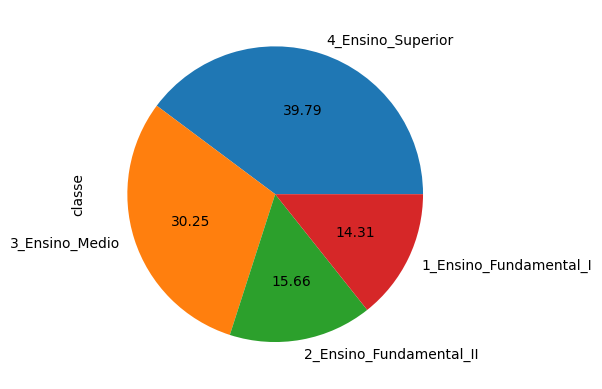

In [ ]:
df_textos_escolares['classe'].value_counts().plot.pie(autopct='%.2f');

# Pré-processamento

In [ ]:
df_textos_escolares.iloc[:, 2]

0       1_Ensino_Fundamental_I
1       1_Ensino_Fundamental_I
2       1_Ensino_Fundamental_I
3       1_Ensino_Fundamental_I
4       1_Ensino_Fundamental_I
                 ...          
2071         4_Ensino_Superior
2072         4_Ensino_Superior
2073         4_Ensino_Superior
2074         4_Ensino_Superior
2075         4_Ensino_Superior
Name: classe, Length: 2076, dtype: object

In [ ]:
df_textos_escolares.iloc[:,1]

0        O jovem inventor Nicephóre Niepce foi quem co...
1        As coisas pioraram nas cidades, porque os pré...
2        Você acredita que mais de 600 mil lusitanos v...
3        Depois de dar um duro danado, acordando muito...
4        Para que todas essas coisas existam, as pesso...
                              ...                        
2071    Logística/Manutenção de instalações/Elevador e...
2072    Logística/Serviço ao cliente/Introdução\nAinda...
2073    Logística/Serviço ao cliente/O serviço e a fid...
2074    Logística/Gestão de desperdícios e rejeitados/...
2075    Álgebra linear/Transformações lineares\nSejam ...
Name: conteudo_original, Length: 2076, dtype: object

In [ ]:
grau_y = [0 if w == '1_Ensino_Fundamental_I'
          else 1 if w == '2_Ensino_Fundamental_II'
          else 2 if w == '3_Ensino_Medio'
          else 3
          for w in df_textos_escolares.iloc[:,2]]
texto_x = df_textos_escolares.iloc[:,1]

In [ ]:
data = [{ 'x': texto_x, 'y': grau_y } for (texto_x, grau_y) in zip(texto_x, grau_y)]

In [ ]:
shuffle(data)

In [ ]:
size = int(len(data) * 0.2)
treino = data[size:]
teste = data[:size]

len(treino), len(teste)

(1661, 415)

In [ ]:
#class weights

import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from collections import Counter

labels = [sample['y'] for sample in treino]

class_sample_count = Counter(labels)

num_classes = len(class_sample_count)

weights = torch.zeros(num_classes)
for i in range(num_classes):
    weights[i] = 1.0 / class_sample_count[i]

sample_weights = [weights[label] for label in labels]


sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)


# Modelo

In [ ]:
!pip3 install transformers
import os
import torch
import torch.nn as nn
from torch import optim
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nclasses = 4
nepochs = 5
batch_size = 16
batch_status = 2
learning_rate = 1e-5
early_stop = 2

max_length = 200
write_path = '/content/drive/MyDrive/Trabalho_PLN/modelo'

In [ ]:
from torch.utils.data import DataLoader

shuffle(data)
size = int(len(data) * 0.2)
treino = data[size:]
teste = data[:size]

len(treino), len(teste)


#traindata = DataLoader(treino, batch_size=batch_size, shuffle=True)
traindata = DataLoader(treino, batch_size=batch_size, sampler=sampler)
testdata = DataLoader(teste, batch_size=batch_size, shuffle=True)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased',
    do_lower_case=False,  # Manter maiúsculas e minúsculas originais
    do_basic_tokenize=True,  # Realizar tokenização básica
    strip_accents=False,  # remover acentos
    max_length= max_length,  # Comprimento máximo das sequências
    padding= max_length,  # Aplicar padding para ter comprimento fixo
    truncation=True,) # Truncar sequências mais longas que max_length

model = AutoModelForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased', num_labels=nclasses).to(device)

optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Fine-Tuning

In [ ]:
def evaluate(model, testdata):
  model.eval()
  y_real, y_pred = [], []
  for batch_idx, inp in enumerate(testdata):
    texts, labels = inp['x'], inp['y']

    # classifying
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)
    output = model(**inputs)

    pred_labels = torch.argmax(output.logits, 1)

    y_real.extend(labels.tolist())
    y_pred.extend(pred_labels.tolist())

    if (batch_idx+1) % batch_status == 0:
      print('Progress:', round(batch_idx / len(testdata), 2), batch_idx)

  print(classification_report(y_real, y_pred, labels=[0, 1, 2, 3], target_names=['1_Ensino_Fundamental_I', '2_Ensino_Fundamental_II', '3_Ensino_Medio', '4_Ensino_Superior']))
  f1 = f1_score(y_real, y_pred, average='weighted')
  acc = accuracy_score(y_real, y_pred)
  bac = balanced_accuracy_score(y_real, y_pred)
  conf_matrix = confusion_matrix(y_real, y_pred)
  return f1, acc, bac

In [ ]:
max_f1, repeat, max_bac = 0, 0, 0
for epoch in range(nepochs):
  model.train()
  f1, acc, bac = evaluate(model, testdata)
  losses = []
  for batch_idx, inp in enumerate(traindata):
    texts, labels = inp['x'], inp['y']

    # classifying
    inputs = tokenizer(texts, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length).to(device)
    output = model(**inputs, labels=labels.to(device))

    # Calculate loss
    loss = output.loss
    losses.append(float(loss))

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Display
    if (batch_idx+1) % batch_status == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tTotal Loss: {:.6f}'.format(epoch, \
        batch_idx+1, len(traindata), 100. * batch_idx / len(traindata),
        float(loss), round(sum(losses) / len(losses), 5)))

  f1, acc, bac = evaluate(model, testdata)
  print('F1: ', f1, 'Accuracy: ', acc, ' BAC: ', bac)
  if f1 > max_f1:
    model.save_pretrained(os.path.join(write_path, 'model'))
    max_f1 = f1
    repeat = 0
    print('Saving best model...')
  else:
    repeat += 1

  if repeat == early_stop:
    break

Progress: 0.04 1
Progress: 0.12 3
Progress: 0.19 5
Progress: 0.27 7
Progress: 0.35 9
Progress: 0.42 11
Progress: 0.5 13
Progress: 0.58 15
Progress: 0.65 17
Progress: 0.73 19
Progress: 0.81 21
Progress: 0.88 23
Progress: 0.96 25
                         precision    recall  f1-score   support

 1_Ensino_Fundamental_I       0.17      0.70      0.28        56
2_Ensino_Fundamental_II       0.07      0.03      0.04        72
         3_Ensino_Medio       0.00      0.00      0.00       137
      4_Ensino_Superior       0.39      0.42      0.40       150

               accuracy                           0.25       415
              macro avg       0.16      0.29      0.18       415
           weighted avg       0.18      0.25      0.19       415



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Epoch: 0 [2/104 (1%)]	Loss: 1.322953	Total Loss: 1.386010
Train Epoch: 0 [4/104 (3%)]	Loss: 1.347332	Total Loss: 1.370390
Train Epoch: 0 [6/104 (5%)]	Loss: 1.350762	Total Loss: 1.383000
Train Epoch: 0 [8/104 (7%)]	Loss: 1.177469	Total Loss: 1.341710
Train Epoch: 0 [10/104 (9%)]	Loss: 1.327870	Total Loss: 1.328070
Train Epoch: 0 [12/104 (11%)]	Loss: 1.232379	Total Loss: 1.309520
Train Epoch: 0 [14/104 (12%)]	Loss: 1.113580	Total Loss: 1.283080
Train Epoch: 0 [16/104 (14%)]	Loss: 1.004374	Total Loss: 1.260810
Train Epoch: 0 [18/104 (16%)]	Loss: 1.224635	Total Loss: 1.255420
Train Epoch: 0 [20/104 (18%)]	Loss: 1.191870	Total Loss: 1.243930
Train Epoch: 0 [22/104 (20%)]	Loss: 1.145683	Total Loss: 1.236470
Train Epoch: 0 [24/104 (22%)]	Loss: 0.924692	Total Loss: 1.214520
Train Epoch: 0 [26/104 (24%)]	Loss: 1.158229	Total Loss: 1.203470
Train Epoch: 0 [28/104 (26%)]	Loss: 1.013707	Total Loss: 1.188530
Train Epoch: 0 [30/104 (28%)]	Loss: 0.951001	Total Loss: 1.180870
Train Epoch: 0 [32/

# Validação

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

def evaluate1(model, testdata):
  model.eval()
  y_real, y_pred = [], []
  for batch_idx, inp in enumerate(testdata):
    texts, labels = inp['x'], inp['y']

    # classifying
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)
    output = model(**inputs)


    pred_labels = torch.argmax(output.logits, 1)

    y_real.extend(labels.tolist())
    y_pred.extend(pred_labels.tolist())

    if (batch_idx+1) % batch_status == 0:
      print('Progress:', round(batch_idx / len(testdata), 2), batch_idx)

  print(classification_report(y_real, y_pred, labels=[0, 1, 2, 3], target_names=['1_Ensino_Fundamental_I', '2_Ensino_Fundamental_II', '3_Ensino_Medio', '4_Ensino_Superior']))
  f1 = f1_score(y_real, y_pred, average='weighted')
  acc = accuracy_score(y_real, y_pred)
  conf_matrix = confusion_matrix(y_real, y_pred)
  bac = balanced_accuracy_score(y_real, y_pred)
  return f1, acc, conf_matrix, bac

Progress: 0.04 1
Progress: 0.12 3
Progress: 0.19 5
Progress: 0.27 7
Progress: 0.35 9
Progress: 0.42 11
Progress: 0.5 13
Progress: 0.58 15
Progress: 0.65 17
Progress: 0.73 19
Progress: 0.81 21
Progress: 0.88 23
Progress: 0.96 25
                         precision    recall  f1-score   support

 1_Ensino_Fundamental_I       0.93      0.96      0.95        56
2_Ensino_Fundamental_II       0.93      0.92      0.92        72
         3_Ensino_Medio       0.95      0.91      0.93       137
      4_Ensino_Superior       0.94      0.98      0.96       150

               accuracy                           0.94       415
              macro avg       0.94      0.94      0.94       415
           weighted avg       0.94      0.94      0.94       415

F1:  0.9418861528407168  Accuracy:  0.9421686746987952  BAC:  0.9415154675008689


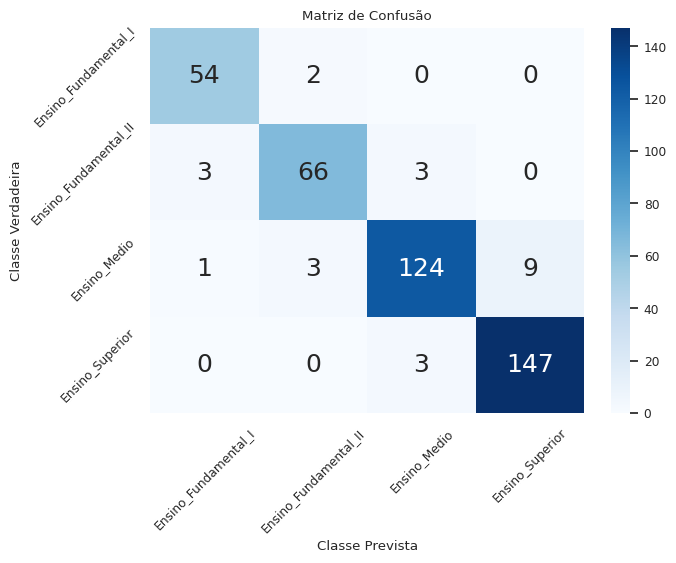

In [ ]:
model_path = os.path.join(write_path, 'model')

modelo_carregado = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=nclasses)
modelo_carregado.to('cuda')

target_names=['Ensino_Fundamental_I', 'Ensino_Fundamental_II', 'Ensino_Medio', 'Ensino_Superior']

f1, acc, conf_matrix, bac = evaluate1(modelo_carregado, testdata)

plt.figure(figsize=(7, 5))
sns.set(font_scale=0.8)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 18}, xticklabels=target_names, yticklabels=target_names)
print('F1: ', f1, ' Accuracy: ', acc, ' BAC: ', bac)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()